# Curso OPenNDAP con Python
## Contenido

- [Herramientas](#Herramientas)
- [Librerías](#Librerías)
- [Datos](#Datos)
- [Explorando los datos con xarray](#Explorando-los-datos-con-xarray)
- [Gráficas](#Gráficas)

# Herramientas
[OPeNDAP](https://hmn.wiki/es/OPeNDAP) Es un acrónimo para "Open-source Project for a Network Data Access Protocol", un protocolo de acceso a datos científicos que pueden ser procesados con xarray.


[Pydap](https://www.pydap.org/en/latest/) Es una librería de Python que implementa el protocolo de acceso a OPeNDAP.


[xarray](https://docs.xarray.dev/en/stable/) es una librería de Python que permite trabajar con arreglos de datos multidimensionales en formato nedcdf:

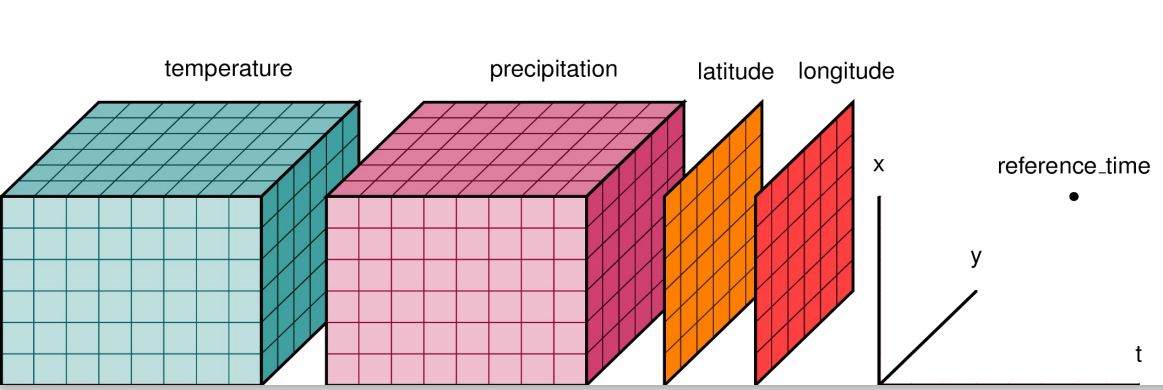

- xarray introduce etiquetas en la forma de dimensiones, coordinadas y atributos sobre arrays tipo NumPy.
- Permite aplicar una serie de operaciones matemáticas sobre los datos.
- Seleccionar variables por nombre.
- Dividir o reagrupar datos 
- Support for remote data analysis via DAP (Data Access Protocol)

# Librerías

Vamos a utilizar `xarray`, `pydap`, `datetime`

In [26]:
import xarray as xr
from pydap.cas.get_cookies import setup_session
from pydap.client import open_url
from datetime import datetime

# Datos
Ahora nos conectaremos a CMENS y accederemos a ciertos datos.Para esto, necesitamos un perfil en cmems con nombre de usuario y password y el url de los datos.

In [27]:
url = "https://my.cmems-du.eu/thredds/dodsC/cmems_mod_ibi_wav_my_0.05deg-2D_PT1H-i"
username = "aturlione" 
password = "B@risih1251"

Una vez creado el perfil, podemos acceder a los datos, para esto utilizamos la función `setup_session` de `pydap` para iniciar sesión con nuestro nombre de usuario y password y luego accedemos a los datos en formato nedcf con la función `PydapDataStore` de xarray. Por último, abrimos el dataset con `open_dataset`.

In [28]:
print('Iniciando sesión')
cas_url = "https://cmems-cas.cls.fr/cas/login"
session = setup_session(cas_url, username, password)
session.cookies.set("CASTGC", session.cookies.get_dict()["CASTGC"])

print('Accediendo a los datos')
data_store = xr.backends.PydapDataStore(open_url(url, session=session))
ds = xr.open_dataset(data_store)
ds

Iniciando sesión
Accediendo a los datos


<xarray.Dataset>
Dimensions:    (latitude: 601, longitude: 481, time: 254184)
Coordinates:
  * latitude   (latitude) float32 26.0 26.05 26.1 26.15 ... 55.9 55.95 56.0
  * longitude  (longitude) float32 -19.0 -18.95 -18.9 -18.85 ... 4.9 4.95 5.0
  * time       (time) datetime64[ns] 1993-01-01 ... 2021-12-30T23:00:00
Data variables: (12/17)
    VHM0       (time, latitude, longitude) float32 ...
    VHM0_SW1   (time, latitude, longitude) float32 ...
    VHM0_SW2   (time, latitude, longitude) float32 ...
    VHM0_WW    (time, latitude, longitude) float32 ...
    VMDR       (time, latitude, longitude) float32 ...
    VMDR_SW1   (time, latitude, longitude) float32 ...
    ...         ...
    VTM01_SW1  (time, latitude, longitude) float32 ...
    VTM01_SW2  (time, latitude, longitude) float32 ...
    VTM01_WW   (time, latitude, longitude) float32 ...
    VTM02      (time, latitude, longitude) float32 ...
    VTM10      (time, latitude, longitude) float32 ...
    VTPK       (time, latitude, longitude) float32 ...
Attributes: (12/19)
    Conventions:    CF-1.0
    institution:    Nologin-Puertos del Estado-MeteoFrance
    title:          CMEMS IBI MULTI-YEAR REANALYSIS: HOURLY WAVE PRODUCTS
    easting:        longitude
    northing:       latitude
    references:     http://marine.copernicus.eu/
    ...             ...
    latitude_min:   26.f
    latitude_max:   56.f
    z_min:          0.0f
    z_max:          0.0f
    contact:        mailto: servicedesk.cmems@mercator-ocean.eu
    source:         IBI-MFC (Operational Production Center)

El data set contiene múltiples arrays multidimensionales (variables) y metadata.

# Explorando los datos con xarray

In [29]:
#get information about the coordinates
ds.coords

Coordinates:
  * latitude   (latitude) float32 26.0 26.05 26.1 26.15 ... 55.9 55.95 56.0
  * longitude  (longitude) float32 -19.0 -18.95 -18.9 -18.85 ... 4.9 4.95 5.0
  * time       (time) datetime64[ns] 1993-01-01 ... 2021-12-30T23:00:00

In [30]:
#get information about the variables
ds.var

<bound method ImplementsDatasetReduce._reduce_method.<locals>.wrapped_func of <xarray.Dataset>
Dimensions:    (latitude: 601, longitude: 481, time: 254184)
Coordinates:
  * latitude   (latitude) float32 26.0 26.05 26.1 26.15 ... 55.9 55.95 56.0
  * longitude  (longitude) float32 -19.0 -18.95 -18.9 -18.85 ... 4.9 4.95 5.0
  * time       (time) datetime64[ns] 1993-01-01 ... 2021-12-30T23:00:00
Data variables: (12/17)
    VHM0       (time, latitude, longitude) float32 ...
    VHM0_SW1   (time, latitude, longitude) float32 ...
    VHM0_SW2   (time, latitude, longitude) float32 ...
    VHM0_WW    (time, latitude, longitude) float32 ...
    VMDR       (time, latitude, longitude) float32 ...
    VMDR_SW1   (time, latitude, longitude) float32 ...
    ...         ...
    VTM01_SW1  (time, latitude, longitude) float32 ...
    VTM01_SW2  (time, latitude, longitude) float32 ...
    VTM01_WW   (time, latitude, longitude) float32 ...
    VTM02      (time, latitude, longitude) float32 ...
    VTM10  

In [31]:
#select a Coordinate -> by name, by integer
ds.isel(time=0)

<xarray.Dataset>
Dimensions:    (latitude: 601, longitude: 481)
Coordinates:
  * latitude   (latitude) float32 26.0 26.05 26.1 26.15 ... 55.9 55.95 56.0
  * longitude  (longitude) float32 -19.0 -18.95 -18.9 -18.85 ... 4.9 4.95 5.0
    time       datetime64[ns] 1993-01-01
Data variables: (12/17)
    VHM0       (latitude, longitude) float32 ...
    VHM0_SW1   (latitude, longitude) float32 ...
    VHM0_SW2   (latitude, longitude) float32 ...
    VHM0_WW    (latitude, longitude) float32 ...
    VMDR       (latitude, longitude) float32 ...
    VMDR_SW1   (latitude, longitude) float32 ...
    ...         ...
    VTM01_SW1  (latitude, longitude) float32 ...
    VTM01_SW2  (latitude, longitude) float32 ...
    VTM01_WW   (latitude, longitude) float32 ...
    VTM02      (latitude, longitude) float32 ...
    VTM10      (latitude, longitude) float32 ...
    VTPK       (latitude, longitude) float32 ...
Attributes: (12/19)
    Conventions:    CF-1.0
    institution:    Nologin-Puertos del Estado-MeteoFrance
    title:          CMEMS IBI MULTI-YEAR REANALYSIS: HOURLY WAVE PRODUCTS
    easting:        longitude
    northing:       latitude
    references:     http://marine.copernicus.eu/
    ...             ...
    latitude_min:   26.f
    latitude_max:   56.f
    z_min:          0.0f
    z_max:          0.0f
    contact:        mailto: servicedesk.cmems@mercator-ocean.eu
    source:         IBI-MFC (Operational Production Center)

In [32]:
#select a Coordinate -> by name, by label
ds.sel(time='1993-01-01T00:00:00.000000000')

<xarray.Dataset>
Dimensions:    (latitude: 601, longitude: 481)
Coordinates:
  * latitude   (latitude) float32 26.0 26.05 26.1 26.15 ... 55.9 55.95 56.0
  * longitude  (longitude) float32 -19.0 -18.95 -18.9 -18.85 ... 4.9 4.95 5.0
    time       datetime64[ns] 1993-01-01
Data variables: (12/17)
    VHM0       (latitude, longitude) float32 ...
    VHM0_SW1   (latitude, longitude) float32 ...
    VHM0_SW2   (latitude, longitude) float32 ...
    VHM0_WW    (latitude, longitude) float32 ...
    VMDR       (latitude, longitude) float32 ...
    VMDR_SW1   (latitude, longitude) float32 ...
    ...         ...
    VTM01_SW1  (latitude, longitude) float32 ...
    VTM01_SW2  (latitude, longitude) float32 ...
    VTM01_WW   (latitude, longitude) float32 ...
    VTM02      (latitude, longitude) float32 ...
    VTM10      (latitude, longitude) float32 ...
    VTPK       (latitude, longitude) float32 ...
Attributes: (12/19)
    Conventions:    CF-1.0
    institution:    Nologin-Puertos del Estado-MeteoFrance
    title:          CMEMS IBI MULTI-YEAR REANALYSIS: HOURLY WAVE PRODUCTS
    easting:        longitude
    northing:       latitude
    references:     http://marine.copernicus.eu/
    ...             ...
    latitude_min:   26.f
    latitude_max:   56.f
    z_min:          0.0f
    z_max:          0.0f
    contact:        mailto: servicedesk.cmems@mercator-ocean.eu
    source:         IBI-MFC (Operational Production Center)

In [33]:
#select a variable
VHM0 = ds['VHM0']
VHM0

<xarray.DataArray 'VHM0' (time: 254184, latitude: 601, longitude: 481)>
[465320872 values with dtype=float32]
Coordinates:
  * latitude   (latitude) float32 26.0 26.05 26.1 26.15 ... 55.9 55.95 56.0
  * longitude  (longitude) float32 -19.0 -18.95 -18.9 -18.85 ... 4.9 4.95 5.0
  * time       (time) datetime64[ns] 1993-01-01 ... 2021-12-30T23:00:00
Attributes:
    units:             m
    standard_name:     sea_surface_wave_significant_height
    long_name:         Spectral significant wave height (Hm0)
    type_of_analysis:  spectral analysis
    WMO_code:          100
    valid_min:         0
    valid_max:         3000
    _ChunkSizes:       [12, 301, 241]

In [34]:
# Select coordinates -> by position, by integer
VHM0[0,:,:]

<xarray.DataArray 'VHM0' (latitude: 601, longitude: 481)>
[289081 values with dtype=float32]
Coordinates:
  * latitude   (latitude) float32 26.0 26.05 26.1 26.15 ... 55.9 55.95 56.0
  * longitude  (longitude) float32 -19.0 -18.95 -18.9 -18.85 ... 4.9 4.95 5.0
    time       datetime64[ns] 1993-01-01
Attributes:
    units:             m
    standard_name:     sea_surface_wave_significant_height
    long_name:         Spectral significant wave height (Hm0)
    type_of_analysis:  spectral analysis
    WMO_code:          100
    valid_min:         0
    valid_max:         3000
    _ChunkSizes:       [12, 301, 241]

In [35]:
# Select a variable and make temporal subset
subset_ds = ds.get("VHM0")

subset_ds = subset_ds.sel(time=slice(datetime(1999,1,1), datetime(1999,2,1)))
subset_ds

<xarray.DataArray 'VHM0' (time: 745, latitude: 601, longitude: 481)>
[215365345 values with dtype=float32]
Coordinates:
  * latitude   (latitude) float32 26.0 26.05 26.1 26.15 ... 55.9 55.95 56.0
  * longitude  (longitude) float32 -19.0 -18.95 -18.9 -18.85 ... 4.9 4.95 5.0
  * time       (time) datetime64[ns] 1999-01-01 ... 1999-02-01
Attributes:
    units:             m
    standard_name:     sea_surface_wave_significant_height
    long_name:         Spectral significant wave height (Hm0)
    type_of_analysis:  spectral analysis
    WMO_code:          100
    valid_min:         0
    valid_max:         3000
    _ChunkSizes:       [12, 301, 241]

In [36]:
#select a variable and coordinates by position, by integer, show the values
VHM0[0,:,0].values

array([1.55     , 1.56     , 1.5699999, 1.5699999, 1.5799999, 1.5899999,
       1.5999999, 1.61     , 1.62     , 1.62     , 1.63     , 1.64     ,
       1.65     , 1.66     , 1.67     , 1.68     , 1.6999999, 1.7099999,
       1.7199999, 1.73     , 1.74     , 1.76     , 1.77     , 1.78     ,
       1.8      , 1.81     , 1.8199999, 1.8399999, 1.8499999, 1.86     ,
       1.87     , 1.89     , 1.9      , 1.91     , 1.92     , 1.93     ,
       1.9399999, 1.9499999, 1.9599999, 1.9699999, 1.9799999, 1.99     ,
       2.       , 2.01     , 2.01     , 2.02     , 2.03     , 2.04     ,
       2.04     , 2.05     , 2.06     , 2.06     , 2.07     , 2.08     ,
       2.08     , 2.09     , 2.09     , 2.1      , 2.1      , 2.11     ,
       2.11     , 2.12     , 2.12     , 2.1299999, 2.1299999, 2.1299999,
       2.1399999, 2.1399999, 2.1499999, 2.1499999, 2.1599998, 2.1599998,
       2.1699998, 2.1699998, 2.18     , 2.18     , 2.19     , 2.2      ,
       2.21     , 2.21     , 2.22     , 2.22     , 

In [37]:
# Select coordinates -> by position, by label
VHM0.loc['1993-01-01T00:00:00.000000000', :, :]

<xarray.DataArray 'VHM0' (latitude: 601, longitude: 481)>
[289081 values with dtype=float32]
Coordinates:
  * latitude   (latitude) float32 26.0 26.05 26.1 26.15 ... 55.9 55.95 56.0
  * longitude  (longitude) float32 -19.0 -18.95 -18.9 -18.85 ... 4.9 4.95 5.0
    time       datetime64[ns] 1993-01-01
Attributes:
    units:             m
    standard_name:     sea_surface_wave_significant_height
    long_name:         Spectral significant wave height (Hm0)
    type_of_analysis:  spectral analysis
    WMO_code:          100
    valid_min:         0
    valid_max:         3000
    _ChunkSizes:       [12, 301, 241]

In [38]:
# Select coordinates -> by name, by integer
VHM0.isel(time=-1)

<xarray.DataArray 'VHM0' (latitude: 601, longitude: 481)>
[289081 values with dtype=float32]
Coordinates:
  * latitude   (latitude) float32 26.0 26.05 26.1 26.15 ... 55.9 55.95 56.0
  * longitude  (longitude) float32 -19.0 -18.95 -18.9 -18.85 ... 4.9 4.95 5.0
    time       datetime64[ns] 2021-12-30T23:00:00
Attributes:
    units:             m
    standard_name:     sea_surface_wave_significant_height
    long_name:         Spectral significant wave height (Hm0)
    type_of_analysis:  spectral analysis
    WMO_code:          100
    valid_min:         0
    valid_max:         3000
    _ChunkSizes:       [12, 301, 241]

In [21]:
# DataArray -> by name, by label
VHM0.sel(time='2021-12-30T23:00:00')

<xarray.DataArray 'VHM0' (latitude: 601, longitude: 481)>
[289081 values with dtype=float32]
Coordinates:
  * latitude   (latitude) float32 26.0 26.05 26.1 26.15 ... 55.9 55.95 56.0
  * longitude  (longitude) float32 -19.0 -18.95 -18.9 -18.85 ... 4.9 4.95 5.0
    time       datetime64[ns] 2021-12-30T23:00:00
Attributes:
    units:             m
    standard_name:     sea_surface_wave_significant_height
    long_name:         Spectral significant wave height (Hm0)
    type_of_analysis:  spectral analysis
    WMO_code:          100
    valid_min:         0
    valid_max:         3000
    _ChunkSizes:       [12, 301, 241]

In [22]:
VHM0.sel(latitude=26)

<xarray.DataArray 'VHM0' (time: 254184, longitude: 481)>
[122262504 values with dtype=float32]
Coordinates:
    latitude   float32 26.0
  * longitude  (longitude) float32 -19.0 -18.95 -18.9 -18.85 ... 4.9 4.95 5.0
  * time       (time) datetime64[ns] 1993-01-01 ... 2021-12-30T23:00:00
Attributes:
    units:             m
    standard_name:     sea_surface_wave_significant_height
    long_name:         Spectral significant wave height (Hm0)
    type_of_analysis:  spectral analysis
    WMO_code:          100
    valid_min:         0
    valid_max:         3000
    _ChunkSizes:       [12, 301, 241]

In [23]:
# Selecting values with isin
VHM0[0,0:10,0].isin([1.55,1.56, 1.57,1.58])

<xarray.DataArray 'VHM0' (latitude: 10)>
array([ True,  True, False, False, False, False, False, False, False,
       False])
Coordinates:
  * latitude   (latitude) float32 26.0 26.05 26.1 26.15 ... 26.35 26.4 26.45
    longitude  float32 -19.0
    time       datetime64[ns] 1993-01-01

In [24]:
# selecting values using vectorized index
VHM0[[0,10],[0,1],[0,20]]

<xarray.DataArray 'VHM0' (time: 2, latitude: 2, longitude: 2)>
array([[[1.55, 1.35],
        [1.56, 1.35]],

       [[1.25, 1.41],
        [1.25, 1.41]]], dtype=float32)
Coordinates:
  * latitude   (latitude) float32 26.0 26.05
  * longitude  (longitude) float32 -19.0 -18.0
  * time       (time) datetime64[ns] 1993-01-01 1993-01-01T10:00:00
Attributes:
    units:             m
    standard_name:     sea_surface_wave_significant_height
    long_name:         Spectral significant wave height (Hm0)
    type_of_analysis:  spectral analysis
    WMO_code:          100
    valid_min:         0
    valid_max:         3000
    _ChunkSizes:       [12, 301, 241]

In [25]:
ds["time"]

<xarray.DataArray 'time' (time: 254184)>
array(['1993-01-01T00:00:00.000000000', '1993-01-01T01:00:00.000000000',
       '1993-01-01T02:00:00.000000000', ..., '2021-12-30T21:00:00.000000000',
       '2021-12-30T22:00:00.000000000', '2021-12-30T23:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 1993-01-01 ... 2021-12-30T23:00:00
Attributes:
    axis:                 T
    long_name:            time
    standard_name:        time
    _CoordinateAxisType:  Time
    _ChunkSizes:          24

In [166]:
#Assigning values with indexing
ds["empty"] = xr.full_like(ds["latitude"], fill_value=0)

In [163]:
ds

<xarray.Dataset>
Dimensions:    (latitude: 601, longitude: 481, time: 254184)
Coordinates:
  * latitude   (latitude) float32 26.0 26.05 26.1 26.15 ... 55.9 55.95 56.0
  * longitude  (longitude) float32 -19.0 -18.95 -18.9 -18.85 ... 4.9 4.95 5.0
  * time       (time) datetime64[ns] 1993-01-01 ... 2021-12-30T23:00:00
Data variables: (12/18)
    VHM0       (time, latitude, longitude) float32 ...
    VHM0_SW1   (time, latitude, longitude) float32 ...
    VHM0_SW2   (time, latitude, longitude) float32 ...
    VHM0_WW    (time, latitude, longitude) float32 ...
    VMDR       (time, latitude, longitude) float32 ...
    VMDR_SW1   (time, latitude, longitude) float32 ...
    ...         ...
    VTM01_SW2  (time, latitude, longitude) float32 ...
    VTM01_WW   (time, latitude, longitude) float32 ...
    VTM02      (time, latitude, longitude) float32 ...
    VTM10      (time, latitude, longitude) float32 ...
    VTPK       (time, latitude, longitude) float32 ...
    empty      (latitude) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
Attributes: (12/19)
    Conventions:    CF-1.0
    institution:    Nologin-Puertos del Estado-MeteoFrance
    title:          CMEMS IBI MULTI-YEAR REANALYSIS: HOURLY WAVE PRODUCTS
    easting:        longitude
    northing:       latitude
    references:     http://marine.copernicus.eu/
    ...             ...
    latitude_min:   26.f
    latitude_max:   56.f
    z_min:          0.0f
    z_max:          0.0f
    contact:        mailto: servicedesk.cmems@mercator-ocean.eu
    source:         IBI-MFC (Operational Production Center)

El método sel() posee los argumentos ''method'' y ''tolerance'' que permiten la búsqueda de vecinos cercanos.

In [124]:
VHM0.sel(time=['2021-12-20T23:00:00','2021-12-30T23:00:00'], method="nearest", tolerance=0.2)

<xarray.DataArray 'VHM0' (time: 2, latitude: 601, longitude: 481)>
[578162 values with dtype=float32]
Coordinates:
  * latitude   (latitude) float32 26.0 26.05 26.1 26.15 ... 55.9 55.95 56.0
  * longitude  (longitude) float32 -19.0 -18.95 -18.9 -18.85 ... 4.9 4.95 5.0
  * time       (time) datetime64[ns] 2021-12-20T23:00:00 2021-12-30T23:00:00
Attributes:
    units:             m
    standard_name:     sea_surface_wave_significant_height
    long_name:         Spectral significant wave height (Hm0)
    type_of_analysis:  spectral analysis
    WMO_code:          100
    valid_min:         0
    valid_max:         3000
    _ChunkSizes:       [12, 301, 241]

In [125]:
VHM0.sel(latitude=[26,31], method="nearest", tolerance=0.2)

<xarray.DataArray 'VHM0' (time: 254184, latitude: 2, longitude: 481)>
[244525008 values with dtype=float32]
Coordinates:
  * latitude   (latitude) float32 26.0 31.0
  * longitude  (longitude) float32 -19.0 -18.95 -18.9 -18.85 ... 4.9 4.95 5.0
  * time       (time) datetime64[ns] 1993-01-01 ... 2021-12-30T23:00:00
Attributes:
    units:             m
    standard_name:     sea_surface_wave_significant_height
    long_name:         Spectral significant wave height (Hm0)
    type_of_analysis:  spectral analysis
    WMO_code:          100
    valid_min:         0
    valid_max:         3000
    _ChunkSizes:       [12, 301, 241]

# Gráficas

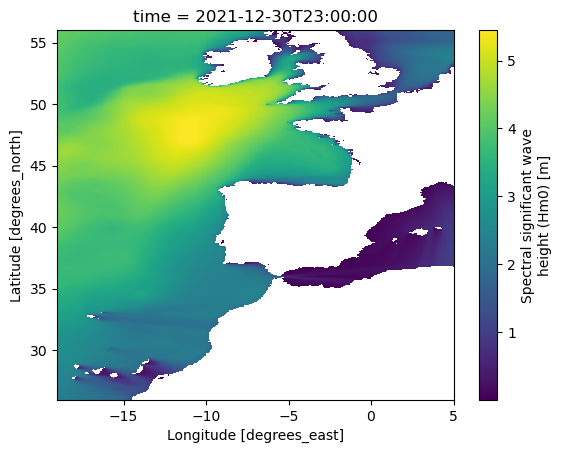

In [93]:
# 3D plot
VHM0.sel(time='2021-12-30T23:00:00').plot()

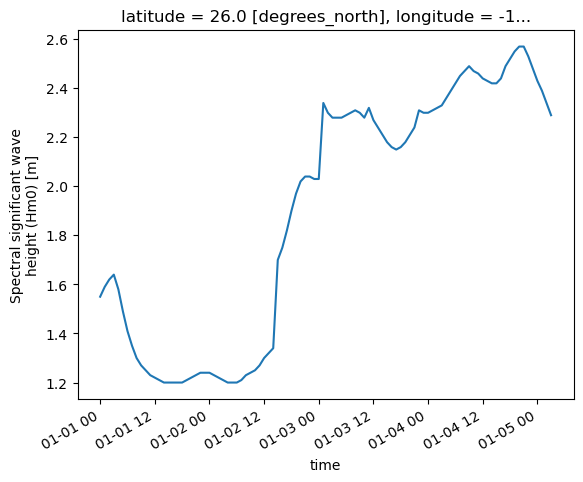

In [94]:
# 2D Plot: variable vs time
VHM0[0:100,0,0].plot()

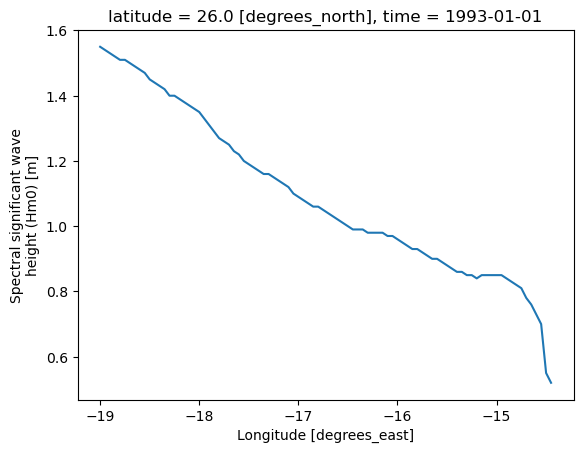

In [96]:
# 2D Plot: variable vs Longitude
VHM0[0,0,:].plot()

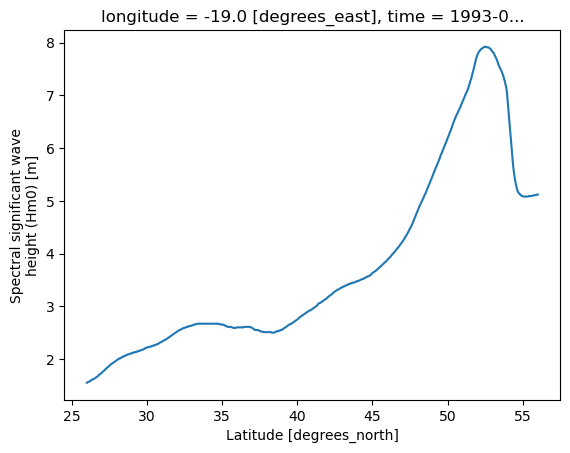

In [97]:
# 2D Plot: variable vs Latitude
VHM0[0,:,0].plot()

In [100]:
# Write netcdf
VHM0[0,0:10,0:10].to_netcdf("VHM0.nc")
VHM0[0,0:10,0:10]

<xarray.DataArray 'VHM0' (time: 254184, latitude: 601, longitude: 481)>
[465320872 values with dtype=float32]
Coordinates:
  * latitude   (latitude) float32 26.0 26.05 26.1 26.15 ... 55.9 55.95 56.0
  * longitude  (longitude) float32 -19.0 -18.95 -18.9 -18.85 ... 4.9 4.95 5.0
  * time       (time) datetime64[ns] 1993-01-01 ... 2021-12-30T23:00:00
Attributes:
    units:             m
    standard_name:     sea_surface_wave_significant_height
    long_name:         Spectral significant wave height (Hm0)
    type_of_analysis:  spectral analysis
    WMO_code:          100
    valid_min:         0
    valid_max:         3000
    _ChunkSizes:       [12, 301, 241]

In [102]:
VHM0[0,0:10,0:10]

<xarray.DataArray 'VHM0' (latitude: 10, longitude: 10)>
array([[1.55, 1.54, 1.53, 1.52, 1.51, 1.51, 1.5 , 1.49, 1.48, 1.47],
       [1.56, 1.55, 1.54, 1.53, 1.52, 1.51, 1.5 , 1.49, 1.48, 1.47],
       [1.57, 1.56, 1.55, 1.54, 1.53, 1.52, 1.51, 1.5 , 1.49, 1.48],
       [1.57, 1.56, 1.55, 1.54, 1.53, 1.53, 1.52, 1.51, 1.5 , 1.48],
       [1.58, 1.57, 1.56, 1.55, 1.54, 1.53, 1.52, 1.51, 1.5 , 1.49],
       [1.59, 1.58, 1.57, 1.56, 1.55, 1.54, 1.53, 1.52, 1.51, 1.5 ],
       [1.6 , 1.59, 1.58, 1.56, 1.55, 1.55, 1.54, 1.52, 1.51, 1.5 ],
       [1.61, 1.6 , 1.58, 1.57, 1.56, 1.55, 1.54, 1.53, 1.52, 1.51],
       [1.62, 1.6 , 1.59, 1.58, 1.57, 1.56, 1.55, 1.54, 1.53, 1.51],
       [1.62, 1.61, 1.6 , 1.59, 1.58, 1.57, 1.56, 1.54, 1.53, 1.52]],
      dtype=float32)
Coordinates:
  * latitude   (latitude) float32 26.0 26.05 26.1 26.15 ... 26.35 26.4 26.45
  * longitude  (longitude) float32 -19.0 -18.95 -18.9 ... -18.65 -18.6 -18.55
    time       datetime64[ns] 1993-01-01
Attributes:
    units:             m
    standard_name:     sea_surface_wave_significant_height
    long_name:         Spectral significant wave height (Hm0)
    type_of_analysis:  spectral analysis
    WMO_code:          100
    valid_min:         0
    valid_max:         3000
    _ChunkSizes:       [12, 301, 241]

In [103]:
df=VHM0[0,0:10,0:10].to_dataframe()
df

time  VHM0
latitude  longitude                  
26.000000 -19.000000 1993-01-01  1.55
          -18.950001 1993-01-01  1.54
          -18.900000 1993-01-01  1.53
          -18.850000 1993-01-01  1.52
          -18.799999 1993-01-01  1.51
...                         ...   ...
26.450001 -18.750000 1993-01-01  1.57
          -18.700001 1993-01-01  1.56
          -18.650000 1993-01-01  1.54
          -18.600000 1993-01-01  1.53
          -18.549999 1993-01-01  1.52

[100 rows x 2 columns]

Aparición de NaN's: no hay un valor asignado de la variable en cuestion para cada posible combinacion de coordenadas. Esto sucede cuando se pasa de una tabla a cubo.

In [60]:
# Export to other formats... 
df.to_csv("VHM0.csv")
df.to_html("VHM0.html")

# Check arguments in libraries docuemntation for more options...
df.to_json("VHM0.json", orient="records", indent=4)